# Sentimental Analysis 

In [14]:
# Import libraries
import pandas as pd
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [3]:
# Read the FormulaE.xlsx file from one directory above the current script's location
df = pd.read_excel('../GranTurismoFolgore.xlsx')

# Display the summary statistics of the DataFrame to get an overview of the data#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      1687 non-null   object
 1   Username   1687 non-null   object
 2   Comment    1687 non-null   object
 3   Date       1687 non-null   object
 4   LikeCount  642 non-null    object
dtypes: object(5)
memory usage: 66.0+ KB


## Method 1: Vader

In [4]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jocelyn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of the sentence 'I am not happy!'
score = sia.polarity_scores('I am not happy!')
score

{'neg': 0.622, 'neu': 0.378, 'pos': 0.0, 'compound': -0.509}

In [7]:
# Access the 'Comment' column of the DataFrame
df.Comment

0       There are speed limits on Italian roads, but n...
1       we honestly need to see these in india. under ...
2                                           That sucks!! 
3                                165 what does it mean ? 
4       Could really feel your smile Sergius, was havi...
                              ...                        
1682                            Unmistakably Ford Puma  😬
1683    Right? The smaller the headlights get and cons...
1684    Front  = Maruti Suzuki Dzire\nBack  - Jagvar F...
1685    It resembles a Ford Puma, in the headlights. n...
1686    Oh look, an overpriced Ford Puma clone with no...
Name: Comment, Length: 1687, dtype: object

In [8]:
# Retrieve the compound sentiment score from the analysis results
score['compound']

-0.509

In [9]:
# Initialise an empty list to store the sentiment values
emotionVader =[]

# Loop through each comment in the DataFrame
for i in df.Comment:
    # Perform sentiment analysis and only retrieve the 'compound' score
    compound= sia.polarity_scores(i)['compound']
    
    # Check if the compound score is positive
    if compound>0:
        # Append 1 to indicate a positive comment
        emotionVader.append(1)
    
    else:
        # Append 0 to indicate a negative or neutral comment
        emotionVader.append(0)

In [10]:
# Add the emotionVader list as a new column 'EmotionVader' in the DataFrame
df['EmotionVader'] = emotionVader

# Display the updated DataFrame with the new 'EmotionVader' column
df

,Title,Username,Comment,Date,LikeCount,EmotionVader
0,2023 Maserati Gran Turismo review - Trofeo & F...,@niminunnikrishnan4481,"There are speed limits on Italian roads, but n...",4 months ago,18 likes,1
1,2023 Maserati Gran Turismo review - Trofeo & F...,@shorehouseclubrecords7862,we honestly need to see these in india. under ...,4 months ago,10 likes,1
2,2023 Maserati Gran Turismo review - Trofeo & F...,@harshsrivastava2588,That sucks!!,4 months ago,NaN,0
3,2023 Maserati Gran Turismo review - Trofeo & F...,@user-pw4pb9sl8v,165 what does it mean ?,3 months ago,NaN,0
4,2023 Maserati Gran Turismo review - Trofeo & F...,@nikhilnambiar2431,"Could really feel your smile Sergius, was havi...",4 months ago,4 likes,1
...,...,...,...,...,...,...
1682,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@numbersletters1442,Unmistakably Ford Puma 😬,1 month ago,2 likes,0
1683,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@cocopuffz604,Right? The smaller the headlights get and cons...,1 month ago,NaN,1
1684,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@sonianarendramodi2605,Front = Maruti Suzuki Dzire\nBack - Jagvar F...,1 month ago,4 likes,0
1685,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@user-nahmannave,"It resembles a Ford Puma, in the headlights. n...",1 month ago,NaN,0


In [11]:
# Count the frequency of each unique value in the 'EmotionVader' column and store it in emotionCount
emotionCount = df['EmotionVader'].value_counts()

# Display the counts of each unique emotion value
emotionCount

EmotionVader
0    845
1    842
Name: count, dtype: int64

## Method 2: Roberta Pretrained Model

In [12]:
# Import libraries
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
import emoji


In [3]:
# Specify the pre-trained model to use for sentiment analysis
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initialize the tokenizer from the pre-trained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initialize the sequence classification model from the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [7]:
df = pd.read_excel('../GranTurismoFolgore.xlsx')

# Iterate through each comment in the DataFrame
for i in df.Comment:
    # Tokenize the comment and prepare it for the model
    encodedText = tokenizer(i, return_tensors='pt')
    
    # Get the sentiment scores using the model
    output = model(**encodedText)
    
    # Extract and detach the scores from the model's output and convert to numpy array
    scores = output[0][0].detach().numpy()
    
    # Apply the Softmax function to the scores to get probabilities
    scores = softmax(scores)
    
    # Create a dictionary to store the sentiment probabilities
    scoresDict = {
        'roberta_neg' : scores[0],  # Negative sentiment probability
        'roberta_neu' : scores[1],  # Neutral sentiment probability
        'roberta_pos' : scores[2]   # Positive sentiment probability
    }

# Display the sentiment scores for the last comment in the DataFrame
print(scoresDict)


{'roberta_neg': 0.7206379, 'roberta_neu': 0.24175856, 'roberta_pos': 0.037603553}


Compound score is calculated to ensure consistency comparable with Vader.
If the score is greater than 0, it is encountered as postive comments; if the score is less than 0, it is encountered as negative comments.

In [8]:
# Initialise an empty list to store the sentiment values based on RoBERTa model
emotionRoberta = []

# Loop through each comment in the DataFrame
for i in df.Comment:
    # Tokenise the comment and prepare it for the model
    encodedText = tokenizer(i, return_tensors='pt')
    
    # Get the sentiment scores using the model
    output = model(**encodedText)
    
    # Extract and detach the scores from the model's output and convert to numpy array
    scores = output[0][0].detach().numpy()
    
    # Apply the Softmax function to the scores to get probabilities
    scores = softmax(scores)
    
    # Calculate a compound score based on the probabilities for negative and positive sentiments
    compoundScore = scores[0] * (-1) + scores[2]

    # Classify the comment as positive or negative based on the compound score
    if compoundScore > 0:
        # Append 1 to indicate a positive comment
        emotionRoberta.append(1)
    else:
        # Append 0 to indicate a negative comment
        emotionRoberta.append(0)

In [9]:
# Add the 'emotionRoberta' list as a new column 'EmotionRoberta' to the DataFrame
df['EmotionRoberta'] = emotionRoberta

# Count the frequency of each unique value in the 'EmotionRoberta' column and store it in 'emotionCount'
emotionCount = df['EmotionRoberta'].value_counts()

# Display the counts of each unique value in the 'EmotionRoberta' column
emotionCount


EmotionRoberta
0    853
1    834
Name: count, dtype: int64

In [10]:
# Save the updated DataFrame to an Excel file named 'RobertaSentimental.xlsx'
df.to_excel('RobertaSentimental.xlsx')

In [13]:
# Initialize a list of all emojis
emojiList = list(emoji.EMOJI_DATA.keys())

# Initialize a counter for emojis that are not identified by the tokenizer
cnt = 0

# Loop through each emoji to check its tokenization
for e in emojiList:
    # Tokenize and decode the emoji, removing special tokens like </s>
    tokenized = tokenizer.decode(tokenizer.encode(e)).strip("</s>").strip()
    
    # Check if the original emoji is not present in the tokenized form
    if e not in tokenized:
        cnt += 1  # Increment the counter if the emoji is not identified

# Calculate and print the proportion of emojis not identified by the tokenizer
print(f"{cnt/len(emojiList)} of the emojis are not identified by this tokenizer.")

0.0 of the emojis are not identified by this tokenizer.


## Emoji preprocessing

In [ ]:
# Concatenate Description method (concat-desc) 
def emoji2concat_description(text):
    emoji_list = emoji.emoji_list(text)
    ret = emoji.replace_emoji(text, replace='').strip()
    for json in emoji_list:
        this_desc = ' '.join(emoji.EMOJI_DATA[json['emoji']]['en'].split('_')).strip(':')
        ret += ' ' + this_desc
    return ret

In [ ]:
# Create a new column 'Processed_Comment' by applying the emoji2concat_description function to 'Comment'
df['processedComment'] = df['Comment'].apply(emoji2concat_description)


In [ ]:
emotionEmoji=[]
for i in df.processedComment:
    encodedText = tokenizer(i, return_tensors='pt')
    output = model(**encodedText)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    compoundScore = scores[0] * (-1) + scores[2]

    if compoundScore>0:
        #positiveComment
        emotionEmoji.append(1)
    
    else:
        #negativeComment
        emotionEmoji.append(0)

In [ ]:
df['EmotionEmoji']=emotionEmoji
emotionCount = df['EmotionEmoji'].value_counts()
emotionCount


0    858
1    829
Name: EmotionEmoji, dtype: int64

In [ ]:
df

,Title,Username,Comment,Date,LikeCount,EmotionVader,EmotionRoberta,processedComment,EmotionEmoji
0,2023 Maserati Gran Turismo review - Trofeo & F...,@niminunnikrishnan4481,"There are speed limits on Italian roads, but n...",4 months ago,18 likes,1,1,"There are speed limits on Italian roads, but n...",1
1,2023 Maserati Gran Turismo review - Trofeo & F...,@shorehouseclubrecords7862,we honestly need to see these in india. under ...,4 months ago,10 likes,1,1,we honestly need to see these in india. under ...,1
2,2023 Maserati Gran Turismo review - Trofeo & F...,@harshsrivastava2588,That sucks!!,4 months ago,NaN,0,0,That sucks!!,0
3,2023 Maserati Gran Turismo review - Trofeo & F...,@user-pw4pb9sl8v,165 what does it mean ?,3 months ago,NaN,0,0,165 what does it mean ?,0
4,2023 Maserati Gran Turismo review - Trofeo & F...,@nikhilnambiar2431,"Could really feel your smile Sergius, was havi...",4 months ago,4 likes,1,1,"Could really feel your smile Sergius, was havi...",1
...,...,...,...,...,...,...,...,...,...
1682,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@numbersletters1442,Unmistakably Ford Puma 😬,1 month ago,2 likes,0,0,Unmistakably Ford Puma grimacing face,0
1683,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@cocopuffz604,Right? The smaller the headlights get and cons...,1 month ago,NaN,1,1,Right? The smaller the headlights get and cons...,1
1684,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@sonianarendramodi2605,Front = Maruti Suzuki Dzire\nBack - Jagvar F...,1 month ago,4 likes,0,1,Front = Maruti Suzuki Dzire\nBack - Jagvar F...,1
1685,Electric MASERATI SUV Grecale 'Folgore' (2023)...,@user-nahmannave,"It resembles a Ford Puma, in the headlights. n...",1 month ago,NaN,0,1,"It resembles a Ford Puma, in the headlights. n...",1


Direct Encoding(dir) is more accurate than Concatenate Description(concat-desc). Therefore, dir is chosen.

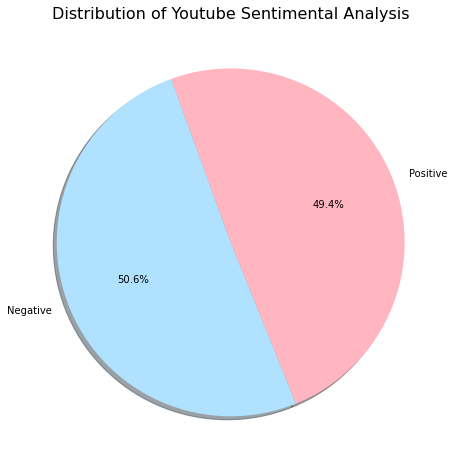

In [15]:
# Calculate the distribution for EmotionRoberta
emotionCounts = df['EmotionRoberta'].value_counts()
emotionCounts
# Plot a pie chart
plt.figure(figsize=(8, 8))
colors = ["#B0E2FF","#FFB6C1"]
labels = ['Negative','Positive']
# explode = (0.1, 0)  # explode 1st slice for better visibility
plt.pie(emotionCounts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=110)
plt.title('Distribution of Youtube Sentimental Analysis',fontsize=16)
plt.show()


In [ ]:
# df.to_excel('processedComment.xlsx')

In [ ]:
# notEqual = (df['EmotionVader'] != df['EmotionRoberta']) | (df['EmotionVader'] != df['EmotionEmoji']) | (df['EmotionRoberta'] != df['EmotionEmoji'])
# # Use the boolean mask to filter the rows where the condition is True

# df['notEqual'] = notEqual  
# df.to_excel('processedComment.xlsx')